In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\ms207\Desktop\CF\6\Data"

In [3]:
df = pd.read_csv(r"C:\Users\ms207\Desktop\CF\6\Data\newupdated.csv")

# Data Cleaning

In [4]:
# checking shape 
df.shape

(13500, 15)

In [5]:
df.columns

Index(['month_date_yyyymm', 'cbsa_code', 'cbsa_title', 'nielsen_hh_rank',
       'hotness_rank', 'hotness_rank_mm', 'hotness_rank_yy', 'hotness_score',
       'supply_score', 'demand_score', 'median_days_on_market',
       'median_days_on_market_yy', 'median_dom_vs_us', 'median_listing_price',
       'median_listing_price_vs_us'],
      dtype='object')

In [6]:
df.rename(columns = {"demand_score" : "Demand_Score"}, inplace = True)

In [7]:
df.dtypes

month_date_yyyymm               int64
cbsa_code                       int64
cbsa_title                     object
nielsen_hh_rank                 int64
hotness_rank                    int64
hotness_rank_mm                 int64
hotness_rank_yy                 int64
hotness_score                 float64
supply_score                  float64
Demand_Score                  float64
median_days_on_market         float64
median_days_on_market_yy      float64
median_dom_vs_us              float64
median_listing_price          float64
median_listing_price_vs_us    float64
dtype: object

In [8]:
df.head()

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,Demand_Score,median_days_on_market,median_days_on_market_yy,median_dom_vs_us,median_listing_price,median_listing_price_vs_us
0,202204,24860,"greenville-anderson-mauldin, sc",61,166,-21,85,45.986622,34.448161,57.525084,36.0,-0.339450,2.0,349500.0,0.8224
1,202204,36260,"ogden-clearfield, ut",101,133,-30,-94,51.337793,86.287625,16.387960,21.0,1.333333,-13.0,569000.0,1.3388
2,202204,23060,"fort wayne, in",119,19,2,28,85.785953,79.264214,92.307692,24.0,-0.351351,-10.0,270000.0,0.6353
3,202204,29100,"la crosse-onalaska, wi-mn",293,6,-3,8,95.986622,93.979933,97.993311,16.0,-0.319149,-18.0,340000.0,0.8000
4,202204,31420,"macon, ga",199,233,-63,-12,31.772575,41.137124,22.408027,34.0,-0.093333,0.0,209000.0,0.4918


# Missing Values Check: 

In [9]:
#check for missing values
df.isnull().sum()

month_date_yyyymm             0
cbsa_code                     0
cbsa_title                    0
nielsen_hh_rank               0
hotness_rank                  0
hotness_rank_mm               0
hotness_rank_yy               0
hotness_score                 0
supply_score                  0
Demand_Score                  0
median_days_on_market         0
median_days_on_market_yy      0
median_dom_vs_us              0
median_listing_price          0
median_listing_price_vs_us    0
dtype: int64

# Duplicates Check:

In [10]:
#Find duplicates 
df_dups = df[df.duplicated()]

In [11]:
df_dups.shape

(0, 15)

# Mixed-Type Data: 


In [12]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

# Correlations: 


In [13]:
df.corr()

,month_date_yyyymm,cbsa_code,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,Demand_Score,median_days_on_market,median_days_on_market_yy,median_dom_vs_us,median_listing_price,median_listing_price_vs_us
month_date_yyyymm,1.000000e+00,-2.348192e-18,-8.723622e-19,2.617086e-18,0.000000,0.000000,-0.002483,-0.003939,-3.953300e-18,-0.451558,-0.349959,-0.038627,0.160728,-0.007282
cbsa_code,-2.348192e-18,1.000000e+00,-2.422017e-02,-1.334537e-01,-0.006307,-0.024481,0.133928,0.091647,1.204716e-01,-0.070067,0.027623,-0.092004,0.095482,0.098006
nielsen_hh_rank,-8.723622e-19,-2.422017e-02,1.000000e+00,9.298698e-02,0.010347,0.100235,-0.085566,-0.304093,1.678385e-01,0.226625,-0.030166,0.297578,-0.225001,-0.231214
hotness_rank,2.617086e-18,-1.334537e-01,9.298698e-02,1.000000e+00,-0.141714,-0.291563,-0.992780,-0.786317,-7.863935e-01,0.559364,0.143758,0.734491,-0.137459,-0.140063
hotness_rank_mm,0.000000e+00,-6.306940e-03,1.034675e-02,-1.417139e-01,1.000000,0.293331,0.132430,0.113628,9.618697e-02,-0.063723,-0.135015,-0.083674,-0.002560,0.000013
hotness_rank_yy,0.000000e+00,-2.448137e-02,1.002346e-01,-2.915630e-01,0.293331,1.000000,0.277080,0.153534,2.852057e-01,-0.089737,-0.512973,-0.117832,-0.032223,-0.041962
hotness_score,-2.482716e-03,1.339277e-01,-8.556588e-02,-9.927797e-01,0.132430,0.277080,1.000000,0.791370,7.927769e-01,-0.566508,-0.148846,-0.746282,0.129147,0.132711
supply_score,-3.938882e-03,9.164669e-02,-3.040932e-01,-7.863173e-01,0.113628,0.153534,0.791370,1.000000,2.547623e-01,-0.703369,-0.140665,-0.927404,0.205591,0.209020
Demand_Score,-3.953300e-18,1.204716e-01,1.678385e-01,-7.863935e-01,0.096187,0.285206,0.792777,0.254762,1.000000e+00,-0.194825,-0.095198,-0.255821,-0.000695,0.001525
median_days_on_market,-4.515581e-01,-7.006726e-02,2.266253e-01,5.593637e-01,-0.063723,-0.089737,-0.566508,-0.703369,-1.948247e-01,1.000000,0.403741,0.766929,-0.225559,-0.122319


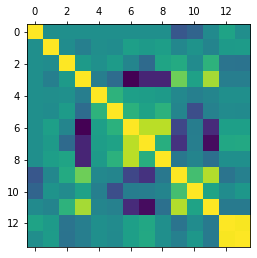

In [14]:
plt.matshow(df.corr())

Text(0.5, 1.0, 'Correlation Matrix')

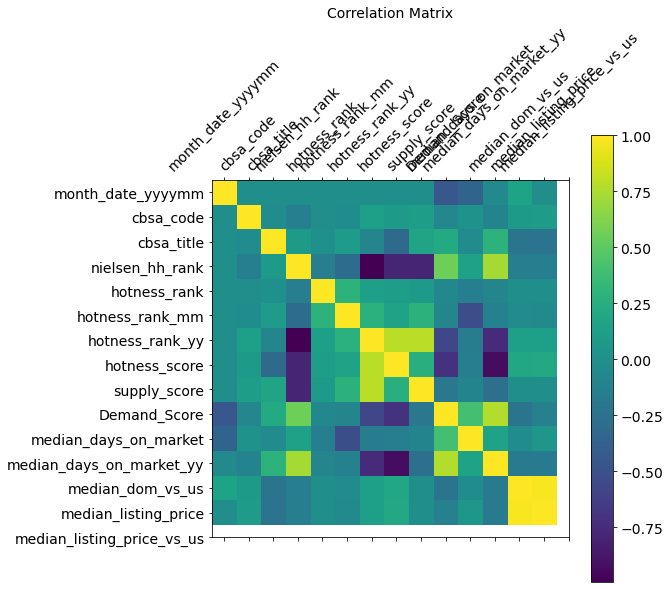

In [15]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [16]:
df.columns

Index(['month_date_yyyymm', 'cbsa_code', 'cbsa_title', 'nielsen_hh_rank',
       'hotness_rank', 'hotness_rank_mm', 'hotness_rank_yy', 'hotness_score',
       'supply_score', 'Demand_Score', 'median_days_on_market',
       'median_days_on_market_yy', 'median_dom_vs_us', 'median_listing_price',
       'median_listing_price_vs_us'],
      dtype='object')

In [17]:
sub = df[['Demand_Score', 'hotness_score', 'median_days_on_market', 'median_listing_price']]

In [18]:
sub

,Demand_Score,hotness_score,median_days_on_market,median_listing_price
0,57.525084,45.986622,36.0,349500.0
1,16.387960,51.337793,21.0,569000.0
2,92.307692,85.785953,24.0,270000.0
3,97.993311,95.986622,16.0,340000.0
4,22.408027,31.772575,34.0,209000.0
...,...,...,...,...
13495,31.772575,61.872910,37.0,764450.0
13496,61.538462,67.892977,47.5,259500.0
13497,57.525084,66.387960,47.0,252945.0
13498,53.511706,70.234114,41.5,374950.0


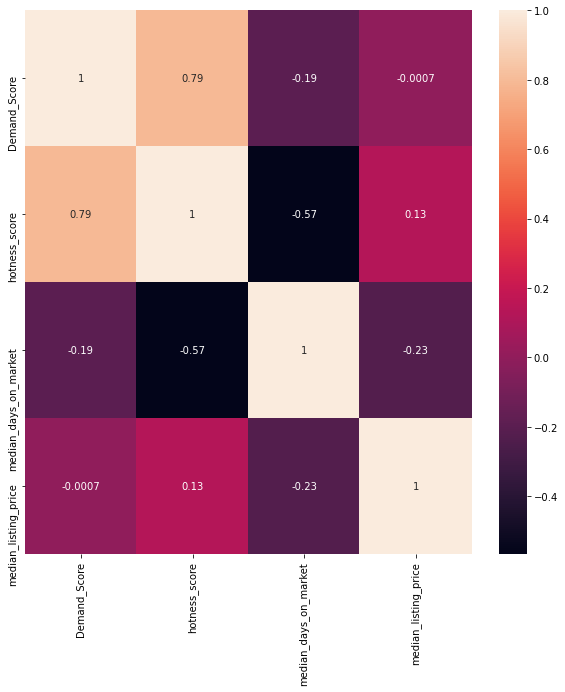

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

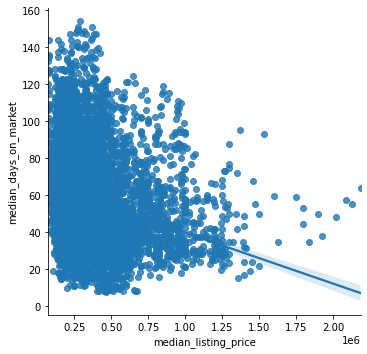

In [20]:
# Create a scatterplot for the "" and "" columns in seaborn

sns.lmplot(x = 'median_listing_price', y = 'median_days_on_market', data = df)

In [21]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['median_listing_price', 'median_days_on_market', 'Demand_Score']]

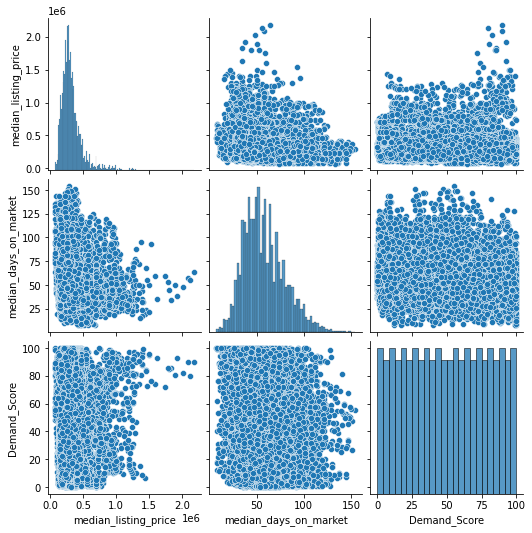

In [22]:
# Create a pair plot 

g = sns.pairplot(sub_2)

<AxesSubplot:xlabel='median_listing_price', ylabel='Count'>

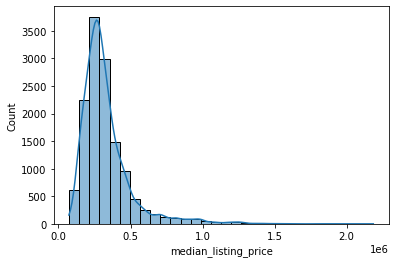

In [23]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['median_listing_price'], bins = 30, kde = True)

In [24]:
df.loc[df['median_listing_price'] < 0.3, 'Median Price'] = 'Low price'

In [25]:
df.loc[(df['median_listing_price'] >= 0.3) & (df['median_listing_price'] < .7), 'Median Price'] = 'Middle price'

In [26]:
df.loc[df['median_listing_price'] > .7, 'Median Price'] = 'High price'

In [27]:
df['Median Price'].value_counts(dropna = False)

High price    13500
Name: Median Price, dtype: int64

In [28]:
df.columns

Index(['month_date_yyyymm', 'cbsa_code', 'cbsa_title', 'nielsen_hh_rank',
       'hotness_rank', 'hotness_rank_mm', 'hotness_rank_yy', 'hotness_score',
       'supply_score', 'Demand_Score', 'median_days_on_market',
       'median_days_on_market_yy', 'median_dom_vs_us', 'median_listing_price',
       'median_listing_price_vs_us', 'Median Price'],
      dtype='object')

In [ ]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x='median_listing_price', y='median_days_on_market', hue='Demand_Score', data=df)

# Revisited questions

What markets are having the best appreciation? 
What market have the safest resale trends? 
What markets are showing signs of weakness? 

I am not seeing clear conclusions on these and think that I need to revise my data a little bit to get the info that I need. 

Hypothesis: I believe that Western markets are having the best appreciation in the USA. 